# IMPORTING TENSORFLOW


In [1]:
!pip install onednn-cpu-gomp


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 25.9 MB/s eta 0:00:0000:0100:01


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


# IMPORTING TENSORFLOW

In [3]:
import tensorflow as tf

2023-08-12 02:31:49.487743: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-12 02:31:49.600352: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-12 02:31:50.353986: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-12 02:31:50.356569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-12 02:31:54.054442: W tensorflow/compiler/tf2t

# USING CPU


In [4]:
device = "/device:CPU:0"

In [6]:
pwd

'/home/u116682/currency_detection'

In [9]:
cd ..

/home/u116682


# DATA IMPORTING 

In [29]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "currency_detection/data"

classes = os.listdir(dir_example)
print(classes)

['train', 'test', '.ipynb_checkpoints']


In [30]:
import os

dir_example = "currency_detection/data/train"

train_classes = [d for d in os.listdir(dir_example) if d != '.ipynb_checkpoints']
print(train_classes)


['five hundred', 'ten', 'hundred', 'fifty', 'two hundred', 'twenty']


# DATA VISUALIZATION

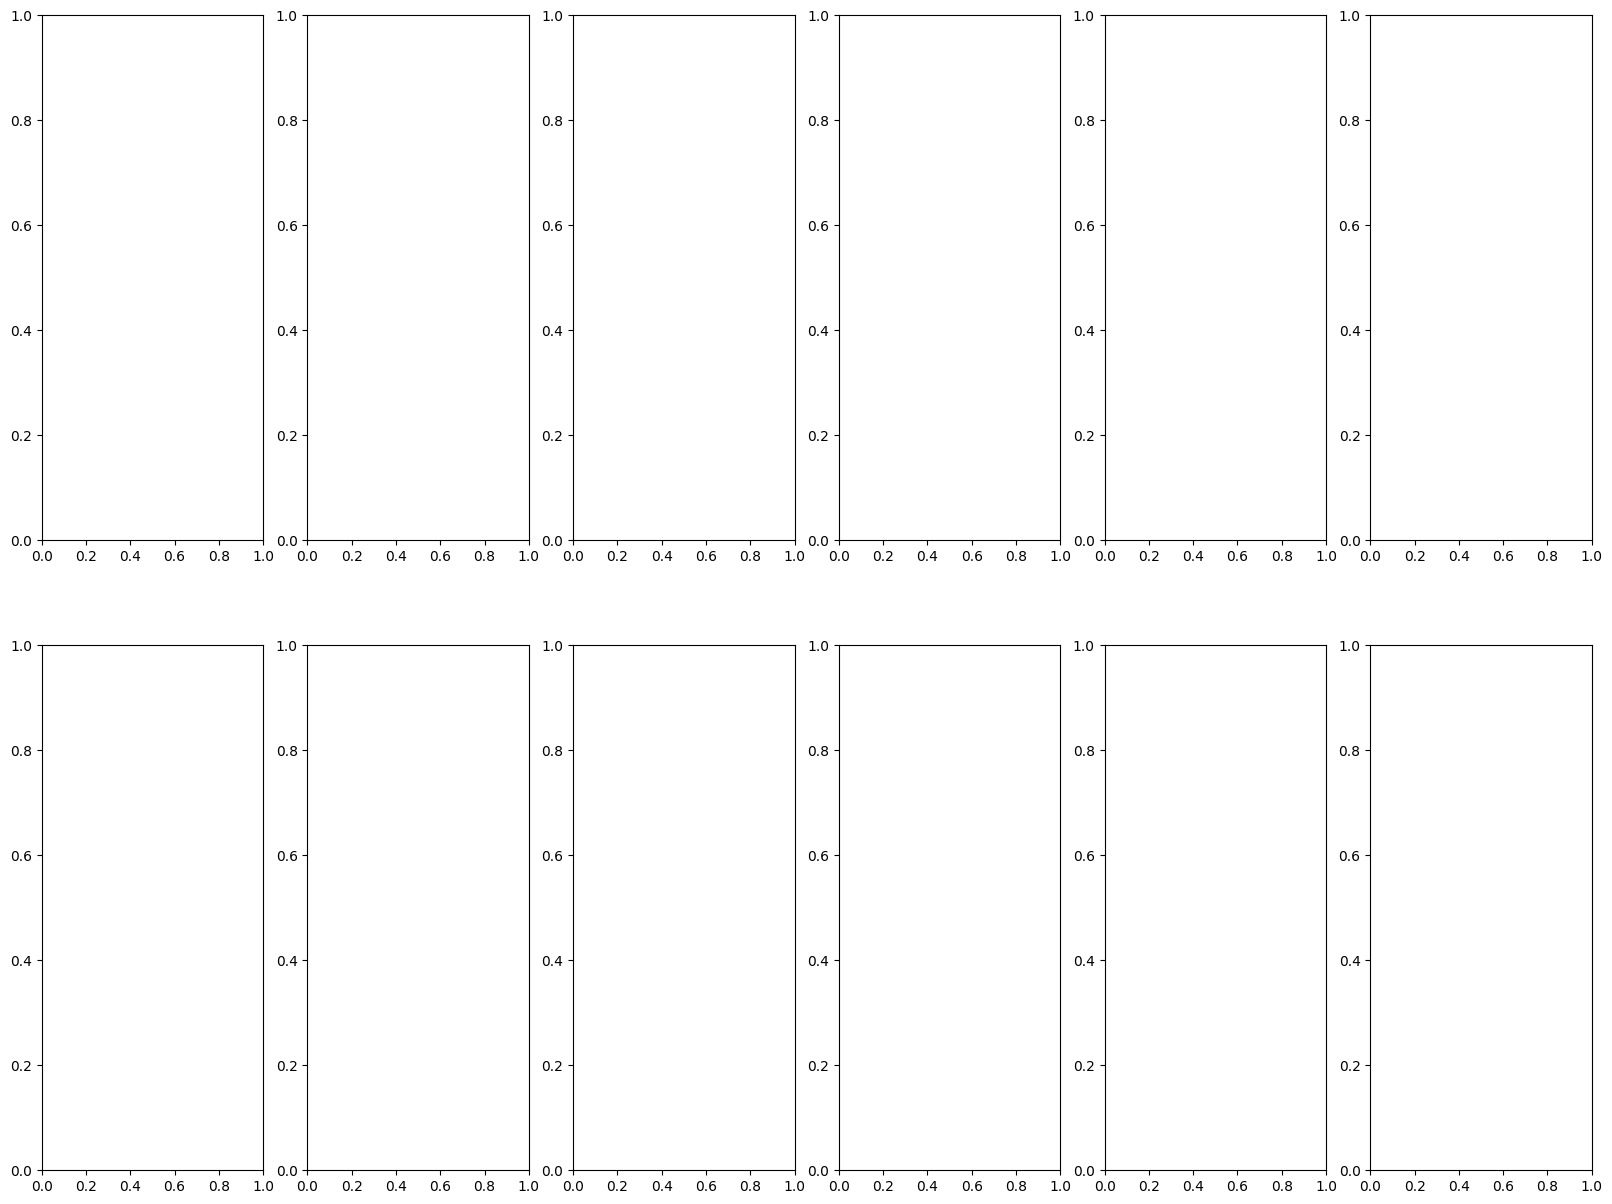

In [31]:
dir_with_examples = 'currency_detection/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA 

In [33]:
train = 'currency_detection/data/train'
test = 'currency_detection/data/test'

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = "currency_detection/data/train"

# List all the classes excluding '.ipynb_checkpoints'
train_classes = [d for d in os.listdir(train_data_dir) if d != '.ipynb_checkpoints']

train_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow_from_directory(train_data_dir,
                                                      target_size=(300, 300),
                                                      batch_size=32,
                                                      class_mode='sparse',
                                                      classes=train_classes)  # Specify the classes

labels = train_generator.class_indices
print(labels, '\n')

labels = {v: k for k, v in labels.items()}
print(labels)


Found 125 images belonging to 6 classes.
{'five hundred': 0, 'ten': 1, 'hundred': 2, 'fifty': 3, 'two hundred': 4, 'twenty': 5} 

{0: 'five hundred', 1: 'ten', 2: 'hundred', 3: 'fifty', 4: 'two hundred', 5: 'twenty'}


In [35]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_data_dir = "currency_detection/data/test"

# List all the classes excluding '.ipynb_checkpoints'
test_classes = [d for d in os.listdir(test_data_dir) if d != '.ipynb_checkpoints']

test_generator = ImageDataGenerator(rescale=1/255)

test_generator = test_generator.flow_from_directory(test_data_dir,
                                                    target_size=(300, 300),
                                                    batch_size=32,
                                                    class_mode='sparse',
                                                    classes=test_classes)  # Specify the classes

test_labels = test_generator.class_indices
print(test_labels, '\n')

test_labels = {v: k for k, v in test_labels.items()}
print(test_labels)


Found 260 images belonging to 6 classes.
{'five hundred': 0, 'ten': 1, 'hundred': 2, 'fifty': 3, 'two hundred': 4, 'twenty': 5} 

{0: 'five hundred', 1: 'ten', 2: 'hundred', 3: 'fifty', 4: 'two hundred', 5: 'twenty'}


# Importing oneDNN 

In [37]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'


os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '1'



# LABELING 

In [38]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'five hundred': 0, 'ten': 1, 'hundred': 2, 'fifty': 3, 'two hundred': 4, 'twenty': 5}


# CREATING MODEL WITH oneDNN OPTIMIZATION 

In [39]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





# COMPILING MODEL  # Enable OneDNN optimizations

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 150, 150, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 37, 37, 32)       

# TRAINING THE MODEL(10 EPOCHS)

In [74]:
model.fit_generator(train_generator,
          epochs=10,
          steps_per_epoch=50//10)

/tmp/ipykernel_3837038/1860577046.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/10
5/5 [==============================] - 1s 218ms/step - loss: 0.2054 - accuracy: 0.9280


# TESTING PREDICTION 

In [52]:
import keras.utils as ku
import numpy as np

In [53]:
from tensorflow.keras.preprocessing.image import load_img


1/1 [==============================] - 0s 26ms/step
Probability: 0.99999857
Classified: ten 



Text(0.5, 1.0, 'Loaded Image')

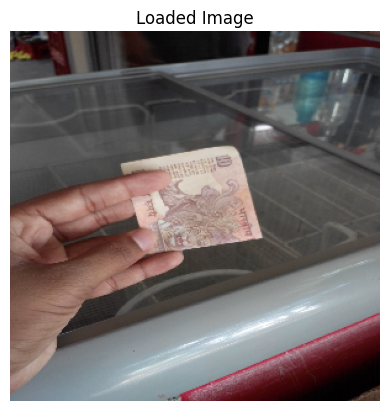

In [77]:
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

test_img = 'currency_detection/data/test/ten/10__49.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [78]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

FIVE HUNDRED : 0.0 %
TEN : 100.0 %
HUNDRED : 0.0 %
FIFTY : 0.0 %
TWO HUNDRED : 0.0 %
TWENTY : 0.0 %


1/1 [==============================] - 0s 24ms/step
Probability: 0.99534225
Classified: hundred 



Text(0.5, 1.0, 'Loaded Image')

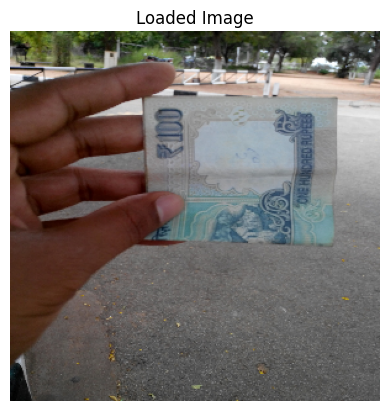

In [83]:
from keras.preprocessing import image

test_img = 'currency_detection/data/test/hundred/100__13.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [84]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

FIVE HUNDRED : 0.0 %
TEN : 0.33 %
HUNDRED : 99.53 %
FIFTY : 0.02 %
TWO HUNDRED : 0.01 %
TWENTY : 0.11 %


1/1 [==============================] - 0s 28ms/step
Probability: 0.8275798
Classified: twenty 



Text(0.5, 1.0, 'Loaded Image')

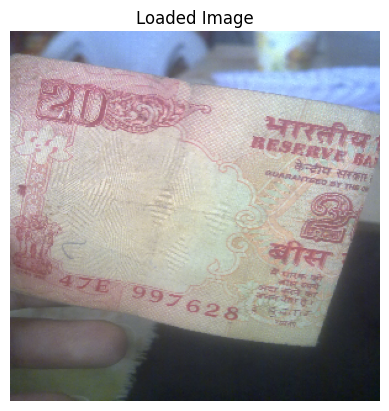

In [85]:
from keras.preprocessing import image

test_img = 'currency_detection/data/test/twenty/20__12.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [86]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

FIVE HUNDRED : 3.06 %
TEN : 12.84 %
HUNDRED : 0.21 %
FIFTY : 0.58 %
TWO HUNDRED : 0.55 %
TWENTY : 82.76 %


1/1 [==============================] - 0s 26ms/step
Probability: 0.8859995
Classified: two hundred 



Text(0.5, 1.0, 'Loaded Image')

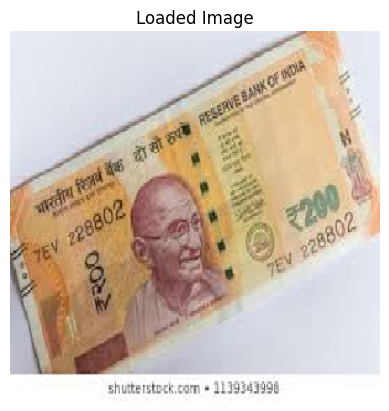

In [87]:
from keras.preprocessing import image

test_img = 'currency_detection/data/test/two hundred/200.__0.jpg'
img = load_img(test_img, target_size = (300,300))
img = img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [88]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

FIVE HUNDRED : 0.04 %
TEN : 0.16 %
HUNDRED : 0.73 %
FIFTY : 0.0 %
TWO HUNDRED : 88.6 %
TWENTY : 10.47 %


# SAVING THE TRAINED MODEL

In [89]:
model.save('modelnew.h5')

/home/u116682/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
pwd

'/home/u116682'

In [92]:
import tensorflow as tf

# Load the saved HDF5 model
model = tf.keras.models.load_model("/home/u116682/modelnew.h5")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpl32txuce/assets


INFO:tensorflow:Assets written to: /tmp/tmpl32txuce/assets
2023-08-12 02:59:32.610976: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-12 02:59:32.610997: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-12 02:59:32.612626: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpl32txuce
2023-08-12 02:59:32.613642: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-12 02:59:32.613651: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpl32txuce
2023-08-12 02:59:32.622922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-08-12 02:59:32.624082: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-08-12 02:59:32.677299: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio